In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
super = pd.read_excel("../../Datasets/class_exercise/Superstore.xls")

In [27]:
super_df=super[["Order Date", "Sales"]]

In [28]:
super_df.head(15)

,Order Date,Sales
0,2013-01-03,16.448
1,2013-01-04,11.784
2,2013-01-04,272.736
3,2013-01-04,3.540
4,2013-01-05,19.536
5,2013-01-06,19.440
6,2013-01-06,12.780
7,2013-01-06,2573.820
8,2013-01-06,609.980
9,2013-01-06,5.480


In [29]:
super_df["Order Date"].min()

Timestamp('2013-01-03 00:00:00')

In [30]:
super_df["Order Date"].max()

Timestamp('2016-12-30 00:00:00')

In [31]:
new_super_df=super_df.groupby("Order Date").agg({"Sales":"sum"}).reset_index()
new_super_df

,Order Date,Sales
0,2013-01-03,16.4480
1,2013-01-04,288.0600
2,2013-01-05,19.5360
3,2013-01-06,4407.1000
4,2013-01-07,87.1580
...,...,...
1232,2016-12-26,814.5940
1233,2016-12-27,177.6360
1234,2016-12-28,1657.3508
1235,2016-12-29,2915.5340


In [32]:
dates_data=pd.date_range(start="2013-01-03", end="2016-12-30", freq="D")
dates_data=pd.DataFrame(dates_data, columns=["Order Date"])

dates_data.head(5)

,Order Date
0,2013-01-03
1,2013-01-04
2,2013-01-05
3,2013-01-06
4,2013-01-07


In [33]:
final_super=pd.merge(dates_data, new_super_df, how="left", left_on="Order Date", right_on="Order Date")
final_super.head(20)

,Order Date,Sales
0,2013-01-03,16.448
1,2013-01-04,288.060
2,2013-01-05,19.536
3,2013-01-06,4407.100
4,2013-01-07,87.158
5,2013-01-08,NaN
6,2013-01-09,40.544
7,2013-01-10,54.830
8,2013-01-11,9.940
9,2013-01-12,NaN


In [34]:
final_super.fillna(method="ffill", inplace=True)

In [35]:
final_super.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [36]:
final_super.shape

(1458, 2)

In [37]:
final_super.set_index("Order Date", inplace=True)

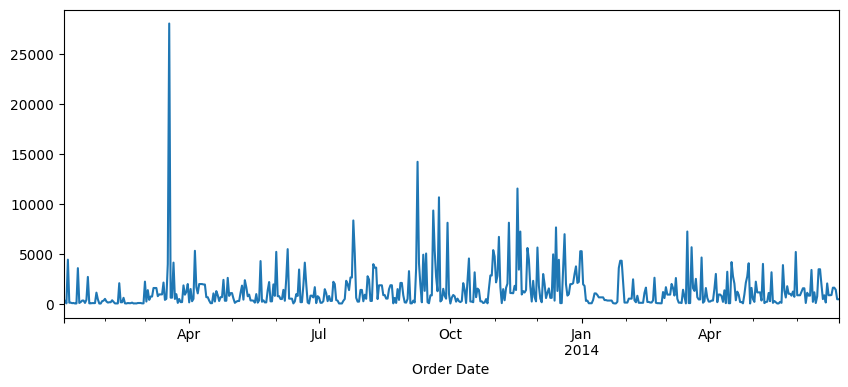

In [38]:
yt=final_super.Sales
yt["2013-01-03":"2014-06-30"].plot(figsize=(10,4))
plt.show()

In [39]:
new_super_df.set_index("Order Date", inplace=True)

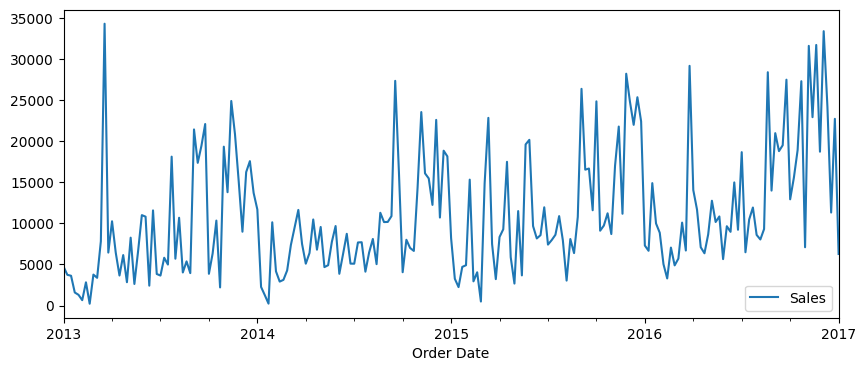

In [40]:
yt1=new_super_df.resample("W").sum()
yt1.plot(figsize=(10,4))
plt.show()

In [41]:
yt1.tail(20)

,Sales
Order Date,
2016-08-21,28382.6580
2016-08-28,13986.7580
2016-09-04,20971.0130
2016-09-11,18786.6490
2016-09-18,19500.6490
2016-09-25,27475.9520
2016-10-02,12927.1750
2016-10-09,15562.8830
2016-10-16,18906.3830


In [42]:
train1=yt1.iloc[:int(len(yt1)*.75)]  # train - 75%
test1=yt1.iloc[int(len(yt1)*.75):]  # test - 25%

In [43]:
import time
tic=time.time()

# single Exponential, Double , Triple
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # Importing the Model
alpha=0.2571428571428571
beta=0.17142857142857143
gamma=0.2571428571428571
exp_model=ExponentialSmoothing(train1, seasonal="mul", trend="mul",seasonal_periods=52, freq="W")  # MS- Start of month
exp_trained_model=exp_model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma) # fitting the model
toc=time.time()
print("Time taken", toc-tic)

Time taken 0.0913839340209961


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [47]:
fcast1=exp_trained_model.forecast(53)

In [46]:
test1.head()

,Sales
Order Date,
2016-01-03,7304.094
2016-01-10,6667.073
2016-01-17,14894.460
2016-01-24,9990.902
2016-01-31,8857.557


In [48]:
test2=test1.Sales

In [50]:
pd.DataFrame({"Act":test2, "fcast":fcast1})

,Act,fcast
2016-01-03,7304.0940,14476.814152
2016-01-10,6667.0730,4752.155781
2016-01-17,14894.4600,3209.350471
2016-01-24,9990.9020,3587.881820
2016-01-31,8857.5570,11049.890215
2016-02-07,5035.7170,11502.087845
2016-02-14,3300.8130,4390.686881
2016-02-21,7054.4654,4300.019880
2016-02-28,4892.5180,4472.254950
2016-03-06,5714.9280,14054.871862


In [51]:
print("MAE", abs(test2-fcast1).mean())

MAE 6135.867962982373


In [53]:
# Finding the optimized value of alpha, beta, gamma
import numpy as np
alpha=np.linspace(0,1,15)
beta=np.linspace(0,1,15)
gamma=np.linspace(0,1,15)
best_alpha=None
best_beta=None
best_gamma=None
mae=789876567
al=[]
bt=[]
gm=[]
ma=[]
cnt=0

for i in alpha:
  for j in beta:
    for k in gamma:
      exp_model=ExponentialSmoothing(train1, seasonal="mul", trend="mul",seasonal_periods=52, freq="W")  # MS- Start of month
      exp_trained_model=exp_model.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k) # fitting the model
      exp_fcast=exp_trained_model.forecast(53)
      temp_mae=abs(test2-exp_fcast).mean()  # mae 120
      al.append(i)
      bt.append(j)
      gm.append(k)
      ma.append(temp_mae)
      cnt+=1
      print(f"No of Loops executed {cnt}\n")

      if temp_mae<mae:
        mae=temp_mae
        best_alpha=i
        best_beta=j
        best_gamma=k

results=pd.DataFrame({"alpha":al, "beta":bt, "gamma":gm, "mae":ma})
best_results={"best_alpha":best_alpha, "best_beta":best_beta, "best_gamma":best_gamma, "best_mae":mae}


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1

No of Loops executed 2

No of Loops executed 3

No of Loops executed 4

No of Loops executed 5

No of Loops executed 6

No of Loops executed 7

No of Loops executed 8

No of Loops executed 9

No of Loops executed 10

No of Loops executed 11

No of Loops executed 12

No of Loops executed 13

No of Loops executed 14

No of Loops executed 15

No of Loops executed 16

No of Loops executed 17

No of Loops executed 18

No of Loops executed 19

No of Loops executed 20

No of Loops executed 21

No of Loops executed 22

No of Loops executed 23

No of Loops executed 24

No of Loops executed 25

No of Loops executed 26

No of Loops executed 27

No of Loops executed 28

No of Loops executed 29

No of Loops executed 30

No of Loops executed 31

No of Loops executed 32

No of Loops executed 33

No of Loops executed 34

No of Loops executed 35

No of Loops executed 36

No of Loops executed 37

No of Loops executed 38

No of Loops executed 39

No of Loops executed 40

No of Loo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 75

No of Loops executed 76

No of Loops executed 77

No of Loops executed 78

No of Loops executed 79

No of Loops executed 80

No of Loops executed 81

No of Loops executed 82

No of Loops executed 83

No of Loops executed 84

No of Loops executed 85

No of Loops executed 86

No of Loops executed 87

No of Loops executed 88

No of Loops executed 89

No of Loops executed 90

No of Loops executed 91

No of Loops executed 92

No of Loops executed 93

No of Loops executed 94

No of Loops executed 95

No of Loops executed 96

No of Loops executed 97

No of Loops executed 98

No of Loops executed 99

No of Loops executed 100

No of Loops executed 101

No of Loops executed 102

No of Loops executed 103

No of Loops executed 104

No of Loops executed 105

No of Loops executed 106

No of Loops executed 107

No of Loops executed 108

No of Loops executed 109

No of Loops executed 110

No of Loops executed 111

No of Loops executed 112

No of Loops executed 113

No of Loops

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 119

No of Loops executed 120

No of Loops executed 121

No of Loops executed 122

No of Loops executed 123

No of Loops executed 124

No of Loops executed 125

No of Loops executed 126

No of Loops executed 127

No of Loops executed 128

No of Loops executed 129

No of Loops executed 130

No of Loops executed 131

No of Loops executed 132

No of Loops executed 133

No of Loops executed 134

No of Loops executed 135

No of Loops executed 136

No of Loops executed 137

No of Loops executed 138

No of Loops executed 139

No of Loops executed 140

No of Loops executed 141

No of Loops executed 142

No of Loops executed 143

No of Loops executed 144

No of Loops executed 145

No of Loops executed 146

No of Loops executed 147

No of Loops executed 148

No of Loops executed 149

No of Loops executed 150



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 151

No of Loops executed 152

No of Loops executed 153

No of Loops executed 154

No of Loops executed 155

No of Loops executed 156

No of Loops executed 157

No of Loops executed 158

No of Loops executed 159

No of Loops executed 160

No of Loops executed 161

No of Loops executed 162

No of Loops executed 163

No of Loops executed 164

No of Loops executed 165

No of Loops executed 166

No of Loops executed 167

No of Loops executed 168

No of Loops executed 169

No of Loops executed 170

No of Loops executed 171

No of Loops executed 172

No of Loops executed 173

No of Loops executed 174

No of Loops executed 175

No of Loops executed 176

No of Loops executed 177

No of Loops executed 178

No of Loops executed 179

No of Loops executed 180

No of Loops executed 181

No of Loops executed 182

No of Loops executed 183

No of Loops executed 184

No of Loops executed 185

No of Loops executed 186



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 187

No of Loops executed 188

No of Loops executed 189

No of Loops executed 190

No of Loops executed 191

No of Loops executed 192

No of Loops executed 193

No of Loops executed 194

No of Loops executed 195

No of Loops executed 196

No of Loops executed 197

No of Loops executed 198

No of Loops executed 199

No of Loops executed 200

No of Loops executed 201

No of Loops executed 202

No of Loops executed 203

No of Loops executed 204

No of Loops executed 205

No of Loops executed 206

No of Loops executed 207

No of Loops executed 208

No of Loops executed 209

No of Loops executed 210

No of Loops executed 211

No of Loops executed 212

No of Loops executed 213

No of Loops executed 214

No of Loops executed 215

No of Loops executed 216

No of Loops executed 217

No of Loops executed 218



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 219

No of Loops executed 220

No of Loops executed 221

No of Loops executed 222

No of Loops executed 223

No of Loops executed 224

No of Loops executed 225

No of Loops executed 226

No of Loops executed 227

No of Loops executed 228

No of Loops executed 229

No of Loops executed 230

No of Loops executed 231

No of Loops executed 232

No of Loops executed 233

No of Loops executed 234

No of Loops executed 235

No of Loops executed 236

No of Loops executed 237

No of Loops executed 238

No of Loops executed 239

No of Loops executed 240

No of Loops executed 241

No of Loops executed 242

No of Loops executed 243

No of Loops executed 244

No of Loops executed 245

No of Loops executed 246

No of Loops executed 247

No of Loops executed 248

No of Loops executed 249

No of Loops executed 250

No of Loops executed 251

No of Loops executed 252

No of Loops executed 253

No of Loops executed 254



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 255

No of Loops executed 256

No of Loops executed 257

No of Loops executed 258

No of Loops executed 259

No of Loops executed 260

No of Loops executed 261

No of Loops executed 262

No of Loops executed 263

No of Loops executed 264

No of Loops executed 265

No of Loops executed 266

No of Loops executed 267

No of Loops executed 268

No of Loops executed 269

No of Loops executed 270

No of Loops executed 271

No of Loops executed 272

No of Loops executed 273

No of Loops executed 274

No of Loops executed 275

No of Loops executed 276

No of Loops executed 277

No of Loops executed 278

No of Loops executed 279

No of Loops executed 280

No of Loops executed 281

No of Loops executed 282

No of Loops executed 283

No of Loops executed 284

No of Loops executed 285

No of Loops executed 286

No of Loops executed 287

No of Loops executed 288

No of Loops executed 289

No of Loops executed 290

No of Loops executed 291

No of Loops executed 292

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 300

No of Loops executed 301

No of Loops executed 302

No of Loops executed 303

No of Loops executed 304

No of Loops executed 305

No of Loops executed 306

No of Loops executed 307

No of Loops executed 308

No of Loops executed 309

No of Loops executed 310

No of Loops executed 311

No of Loops executed 312

No of Loops executed 313

No of Loops executed 314

No of Loops executed 315

No of Loops executed 316

No of Loops executed 317

No of Loops executed 318

No of Loops executed 319

No of Loops executed 320

No of Loops executed 321

No of Loops executed 322

No of Loops executed 323

No of Loops executed 324

No of Loops executed 325

No of Loops executed 326

No of Loops executed 327

No of Loops executed 328

No of Loops executed 329

No of Loops executed 330

No of Loops executed 331

No of Loops executed 332

No of Loops executed 333



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 334

No of Loops executed 335

No of Loops executed 336

No of Loops executed 337

No of Loops executed 338

No of Loops executed 339

No of Loops executed 340

No of Loops executed 341

No of Loops executed 342

No of Loops executed 343

No of Loops executed 344

No of Loops executed 345

No of Loops executed 346

No of Loops executed 347

No of Loops executed 348

No of Loops executed 349

No of Loops executed 350

No of Loops executed 351

No of Loops executed 352

No of Loops executed 353

No of Loops executed 354

No of Loops executed 355

No of Loops executed 356

No of Loops executed 357

No of Loops executed 358

No of Loops executed 359

No of Loops executed 360

No of Loops executed 361

No of Loops executed 362

No of Loops executed 363



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 364

No of Loops executed 365

No of Loops executed 366

No of Loops executed 367

No of Loops executed 368

No of Loops executed 369

No of Loops executed 370

No of Loops executed 371

No of Loops executed 372

No of Loops executed 373

No of Loops executed 374

No of Loops executed 375

No of Loops executed 376

No of Loops executed 377

No of Loops executed 378

No of Loops executed 379

No of Loops executed 380

No of Loops executed 381

No of Loops executed 382

No of Loops executed 383

No of Loops executed 384

No of Loops executed 385

No of Loops executed 386

No of Loops executed 387

No of Loops executed 388

No of Loops executed 389

No of Loops executed 390

No of Loops executed 391

No of Loops executed 392

No of Loops executed 393

No of Loops executed 394

No of Loops executed 395

No of Loops executed 396



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 397

No of Loops executed 398

No of Loops executed 399

No of Loops executed 400

No of Loops executed 401

No of Loops executed 402

No of Loops executed 403

No of Loops executed 404

No of Loops executed 405

No of Loops executed 406

No of Loops executed 407

No of Loops executed 408

No of Loops executed 409

No of Loops executed 410

No of Loops executed 411

No of Loops executed 412

No of Loops executed 413

No of Loops executed 414

No of Loops executed 415

No of Loops executed 416

No of Loops executed 417

No of Loops executed 418

No of Loops executed 419

No of Loops executed 420

No of Loops executed 421

No of Loops executed 422



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 423

No of Loops executed 424

No of Loops executed 425

No of Loops executed 426

No of Loops executed 427

No of Loops executed 428

No of Loops executed 429

No of Loops executed 430

No of Loops executed 431

No of Loops executed 432

No of Loops executed 433

No of Loops executed 434

No of Loops executed 435

No of Loops executed 436

No of Loops executed 437

No of Loops executed 438

No of Loops executed 439

No of Loops executed 440

No of Loops executed 441

No of Loops executed 442

No of Loops executed 443

No of Loops executed 444

No of Loops executed 445

No of Loops executed 446

No of Loops executed 447

No of Loops executed 448

No of Loops executed 449

No of Loops executed 450

No of Loops executed 451

No of Loops executed 452

No of Loops executed 453

No of Loops executed 454

No of Loops executed 455

No of Loops executed 456

No of Loops executed 457

No of Loops executed 458



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 459

No of Loops executed 460

No of Loops executed 461

No of Loops executed 462

No of Loops executed 463

No of Loops executed 464

No of Loops executed 465

No of Loops executed 466

No of Loops executed 467

No of Loops executed 468

No of Loops executed 469

No of Loops executed 470

No of Loops executed 471

No of Loops executed 472

No of Loops executed 473

No of Loops executed 474

No of Loops executed 475

No of Loops executed 476

No of Loops executed 477

No of Loops executed 478

No of Loops executed 479

No of Loops executed 480

No of Loops executed 481

No of Loops executed 482

No of Loops executed 483

No of Loops executed 484

No of Loops executed 485

No of Loops executed 486

No of Loops executed 487

No of Loops executed 488

No of Loops executed 489

No of Loops executed 490

No of Loops executed 491

No of Loops executed 492

No of Loops executed 493



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 494

No of Loops executed 495

No of Loops executed 496

No of Loops executed 497

No of Loops executed 498

No of Loops executed 499

No of Loops executed 500

No of Loops executed 501

No of Loops executed 502

No of Loops executed 503

No of Loops executed 504

No of Loops executed 505

No of Loops executed 506

No of Loops executed 507

No of Loops executed 508

No of Loops executed 509

No of Loops executed 510

No of Loops executed 511

No of Loops executed 512

No of Loops executed 513

No of Loops executed 514

No of Loops executed 515

No of Loops executed 516

No of Loops executed 517

No of Loops executed 518

No of Loops executed 519

No of Loops executed 520

No of Loops executed 521

No of Loops executed 522

No of Loops executed 523

No of Loops executed 524

No of Loops executed 525

No of Loops executed 526

No of Loops executed 527

No of Loops executed 528

No of Loops executed 529

No of Loops executed 530

No of Loops executed 531

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 534

No of Loops executed 535

No of Loops executed 536

No of Loops executed 537

No of Loops executed 538

No of Loops executed 539

No of Loops executed 540

No of Loops executed 541

No of Loops executed 542

No of Loops executed 543

No of Loops executed 544

No of Loops executed 545

No of Loops executed 546

No of Loops executed 547

No of Loops executed 548

No of Loops executed 549

No of Loops executed 550

No of Loops executed 551

No of Loops executed 552

No of Loops executed 553

No of Loops executed 554

No of Loops executed 555

No of Loops executed 556

No of Loops executed 557

No of Loops executed 558

No of Loops executed 559

No of Loops executed 560

No of Loops executed 561

No of Loops executed 562

No of Loops executed 563

No of Loops executed 564

No of Loops executed 565



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 566

No of Loops executed 567

No of Loops executed 568

No of Loops executed 569

No of Loops executed 570

No of Loops executed 571

No of Loops executed 572

No of Loops executed 573

No of Loops executed 574

No of Loops executed 575

No of Loops executed 576

No of Loops executed 577

No of Loops executed 578

No of Loops executed 579

No of Loops executed 580

No of Loops executed 581

No of Loops executed 582

No of Loops executed 583

No of Loops executed 584

No of Loops executed 585

No of Loops executed 586

No of Loops executed 587

No of Loops executed 588

No of Loops executed 589

No of Loops executed 590

No of Loops executed 591

No of Loops executed 592

No of Loops executed 593

No of Loops executed 594

No of Loops executed 595

No of Loops executed 596

No of Loops executed 597

No of Loops executed 598

No of Loops executed 599

No of Loops executed 600

No of Loops executed 601

No of Loops executed 602

No of Loops executed 603

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 606

No of Loops executed 607

No of Loops executed 608

No of Loops executed 609

No of Loops executed 610

No of Loops executed 611

No of Loops executed 612

No of Loops executed 613

No of Loops executed 614

No of Loops executed 615

No of Loops executed 616

No of Loops executed 617

No of Loops executed 618

No of Loops executed 619

No of Loops executed 620

No of Loops executed 621

No of Loops executed 622

No of Loops executed 623

No of Loops executed 624

No of Loops executed 625

No of Loops executed 626

No of Loops executed 627

No of Loops executed 628

No of Loops executed 629

No of Loops executed 630

No of Loops executed 631

No of Loops executed 632

No of Loops executed 633

No of Loops executed 634

No of Loops executed 635

No of Loops executed 636

No of Loops executed 637



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 638

No of Loops executed 639

No of Loops executed 640

No of Loops executed 641

No of Loops executed 642

No of Loops executed 643

No of Loops executed 644

No of Loops executed 645

No of Loops executed 646

No of Loops executed 647

No of Loops executed 648

No of Loops executed 649

No of Loops executed 650

No of Loops executed 651

No of Loops executed 652

No of Loops executed 653

No of Loops executed 654

No of Loops executed 655

No of Loops executed 656

No of Loops executed 657

No of Loops executed 658

No of Loops executed 659

No of Loops executed 660

No of Loops executed 661

No of Loops executed 662

No of Loops executed 663

No of Loops executed 664

No of Loops executed 665

No of Loops executed 666

No of Loops executed 667

No of Loops executed 668

No of Loops executed 669

No of Loops executed 670

No of Loops executed 671

No of Loops executed 672

No of Loops executed 673

No of Loops executed 674

No of Loops executed 675

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 683

No of Loops executed 684

No of Loops executed 685

No of Loops executed 686

No of Loops executed 687

No of Loops executed 688

No of Loops executed 689

No of Loops executed 690

No of Loops executed 691

No of Loops executed 692

No of Loops executed 693

No of Loops executed 694

No of Loops executed 695

No of Loops executed 696

No of Loops executed 697

No of Loops executed 698

No of Loops executed 699

No of Loops executed 700

No of Loops executed 701

No of Loops executed 702

No of Loops executed 703

No of Loops executed 704

No of Loops executed 705

No of Loops executed 706

No of Loops executed 707

No of Loops executed 708

No of Loops executed 709

No of Loops executed 710

No of Loops executed 711

No of Loops executed 712

No of Loops executed 713

No of Loops executed 714

No of Loops executed 715

No of Loops executed 716

No of Loops executed 717



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 718

No of Loops executed 719

No of Loops executed 720

No of Loops executed 721

No of Loops executed 722

No of Loops executed 723

No of Loops executed 724

No of Loops executed 725

No of Loops executed 726

No of Loops executed 727

No of Loops executed 728

No of Loops executed 729

No of Loops executed 730

No of Loops executed 731

No of Loops executed 732

No of Loops executed 733

No of Loops executed 734

No of Loops executed 735

No of Loops executed 736

No of Loops executed 737

No of Loops executed 738

No of Loops executed 739

No of Loops executed 740

No of Loops executed 741

No of Loops executed 742

No of Loops executed 743

No of Loops executed 744

No of Loops executed 745

No of Loops executed 746

No of Loops executed 747

No of Loops executed 748

No of Loops executed 749



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 750

No of Loops executed 751

No of Loops executed 752

No of Loops executed 753

No of Loops executed 754

No of Loops executed 755

No of Loops executed 756

No of Loops executed 757

No of Loops executed 758

No of Loops executed 759

No of Loops executed 760

No of Loops executed 761

No of Loops executed 762

No of Loops executed 763

No of Loops executed 764

No of Loops executed 765

No of Loops executed 766

No of Loops executed 767

No of Loops executed 768

No of Loops executed 769

No of Loops executed 770

No of Loops executed 771

No of Loops executed 772

No of Loops executed 773

No of Loops executed 774

No of Loops executed 775



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 776

No of Loops executed 777

No of Loops executed 778

No of Loops executed 779

No of Loops executed 780

No of Loops executed 781

No of Loops executed 782

No of Loops executed 783

No of Loops executed 784

No of Loops executed 785

No of Loops executed 786

No of Loops executed 787

No of Loops executed 788

No of Loops executed 789

No of Loops executed 790

No of Loops executed 791

No of Loops executed 792

No of Loops executed 793

No of Loops executed 794

No of Loops executed 795

No of Loops executed 796

No of Loops executed 797

No of Loops executed 798

No of Loops executed 799

No of Loops executed 800

No of Loops executed 801

No of Loops executed 802

No of Loops executed 803

No of Loops executed 804

No of Loops executed 805

No of Loops executed 806



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 807

No of Loops executed 808

No of Loops executed 809

No of Loops executed 810

No of Loops executed 811

No of Loops executed 812

No of Loops executed 813

No of Loops executed 814

No of Loops executed 815

No of Loops executed 816

No of Loops executed 817

No of Loops executed 818

No of Loops executed 819

No of Loops executed 820

No of Loops executed 821

No of Loops executed 822

No of Loops executed 823

No of Loops executed 824

No of Loops executed 825

No of Loops executed 826

No of Loops executed 827

No of Loops executed 828

No of Loops executed 829

No of Loops executed 830

No of Loops executed 831

No of Loops executed 832

No of Loops executed 833

No of Loops executed 834

No of Loops executed 835

No of Loops executed 836

No of Loops executed 837

No of Loops executed 838

No of Loops executed 839



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 840

No of Loops executed 841

No of Loops executed 842

No of Loops executed 843

No of Loops executed 844

No of Loops executed 845

No of Loops executed 846

No of Loops executed 847

No of Loops executed 848

No of Loops executed 849

No of Loops executed 850

No of Loops executed 851

No of Loops executed 852

No of Loops executed 853

No of Loops executed 854

No of Loops executed 855

No of Loops executed 856

No of Loops executed 857

No of Loops executed 858

No of Loops executed 859

No of Loops executed 860

No of Loops executed 861

No of Loops executed 862

No of Loops executed 863

No of Loops executed 864

No of Loops executed 865

No of Loops executed 866

No of Loops executed 867

No of Loops executed 868

No of Loops executed 869

No of Loops executed 870

No of Loops executed 871



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 872

No of Loops executed 873

No of Loops executed 874

No of Loops executed 875

No of Loops executed 876

No of Loops executed 877

No of Loops executed 878

No of Loops executed 879

No of Loops executed 880

No of Loops executed 881

No of Loops executed 882

No of Loops executed 883

No of Loops executed 884

No of Loops executed 885

No of Loops executed 886

No of Loops executed 887

No of Loops executed 888

No of Loops executed 889

No of Loops executed 890

No of Loops executed 891

No of Loops executed 892

No of Loops executed 893

No of Loops executed 894

No of Loops executed 895

No of Loops executed 896

No of Loops executed 897

No of Loops executed 898

No of Loops executed 899

No of Loops executed 900

No of Loops executed 901

No of Loops executed 902

No of Loops executed 903

No of Loops executed 904



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 905

No of Loops executed 906

No of Loops executed 907

No of Loops executed 908

No of Loops executed 909

No of Loops executed 910

No of Loops executed 911

No of Loops executed 912

No of Loops executed 913

No of Loops executed 914

No of Loops executed 915

No of Loops executed 916

No of Loops executed 917

No of Loops executed 918

No of Loops executed 919

No of Loops executed 920

No of Loops executed 921

No of Loops executed 922

No of Loops executed 923

No of Loops executed 924

No of Loops executed 925

No of Loops executed 926

No of Loops executed 927

No of Loops executed 928

No of Loops executed 929

No of Loops executed 930

No of Loops executed 931

No of Loops executed 932

No of Loops executed 933

No of Loops executed 934

No of Loops executed 935

No of Loops executed 936

No of Loops executed 937

No of Loops executed 938

No of Loops executed 939

No of Loops executed 940

No of Loops executed 941

No of Loops executed 942

No of Loops 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 946

No of Loops executed 947

No of Loops executed 948

No of Loops executed 949

No of Loops executed 950

No of Loops executed 951

No of Loops executed 952

No of Loops executed 953

No of Loops executed 954

No of Loops executed 955

No of Loops executed 956

No of Loops executed 957

No of Loops executed 958

No of Loops executed 959

No of Loops executed 960

No of Loops executed 961

No of Loops executed 962

No of Loops executed 963

No of Loops executed 964

No of Loops executed 965

No of Loops executed 966

No of Loops executed 967

No of Loops executed 968

No of Loops executed 969

No of Loops executed 970

No of Loops executed 971

No of Loops executed 972

No of Loops executed 973

No of Loops executed 974

No of Loops executed 975

No of Loops executed 976

No of Loops executed 977

No of Loops executed 978

No of Loops executed 979

No of Loops executed 980

No of Loops executed 981

No of Loops executed 982

No of Loops executed 983



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 984

No of Loops executed 985

No of Loops executed 986

No of Loops executed 987

No of Loops executed 988

No of Loops executed 989

No of Loops executed 990

No of Loops executed 991

No of Loops executed 992

No of Loops executed 993

No of Loops executed 994

No of Loops executed 995

No of Loops executed 996

No of Loops executed 997

No of Loops executed 998

No of Loops executed 999

No of Loops executed 1000

No of Loops executed 1001

No of Loops executed 1002

No of Loops executed 1003

No of Loops executed 1004

No of Loops executed 1005

No of Loops executed 1006

No of Loops executed 1007

No of Loops executed 1008

No of Loops executed 1009

No of Loops executed 1010

No of Loops executed 1011

No of Loops executed 1012

No of Loops executed 1013

No of Loops executed 1014

No of Loops executed 1015

No of Loops executed 1016

No of Loops executed 1017

No of Loops executed 1018

No of Loops executed 1019

No of Loops executed 1020

No of Loops execu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1024

No of Loops executed 1025

No of Loops executed 1026

No of Loops executed 1027

No of Loops executed 1028

No of Loops executed 1029

No of Loops executed 1030

No of Loops executed 1031

No of Loops executed 1032

No of Loops executed 1033

No of Loops executed 1034

No of Loops executed 1035

No of Loops executed 1036

No of Loops executed 1037

No of Loops executed 1038

No of Loops executed 1039

No of Loops executed 1040

No of Loops executed 1041

No of Loops executed 1042

No of Loops executed 1043

No of Loops executed 1044

No of Loops executed 1045

No of Loops executed 1046

No of Loops executed 1047

No of Loops executed 1048

No of Loops executed 1049

No of Loops executed 1050

No of Loops executed 1051

No of Loops executed 1052

No of Loops executed 1053

No of Loops executed 1054

No of Loops executed 1055

No of Loops executed 1056

No of Loops executed 1057

No of Loops executed 1058

No of Loops executed 1059

No of Loops executed 1060

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1074

No of Loops executed 1075

No of Loops executed 1076

No of Loops executed 1077

No of Loops executed 1078

No of Loops executed 1079

No of Loops executed 1080

No of Loops executed 1081

No of Loops executed 1082

No of Loops executed 1083

No of Loops executed 1084

No of Loops executed 1085

No of Loops executed 1086

No of Loops executed 1087

No of Loops executed 1088

No of Loops executed 1089

No of Loops executed 1090

No of Loops executed 1091

No of Loops executed 1092

No of Loops executed 1093

No of Loops executed 1094

No of Loops executed 1095

No of Loops executed 1096

No of Loops executed 1097

No of Loops executed 1098

No of Loops executed 1099

No of Loops executed 1100

No of Loops executed 1101

No of Loops executed 1102

No of Loops executed 1103

No of Loops executed 1104

No of Loops executed 1105

No of Loops executed 1106



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1107

No of Loops executed 1108

No of Loops executed 1109

No of Loops executed 1110

No of Loops executed 1111

No of Loops executed 1112

No of Loops executed 1113

No of Loops executed 1114

No of Loops executed 1115

No of Loops executed 1116

No of Loops executed 1117

No of Loops executed 1118

No of Loops executed 1119

No of Loops executed 1120

No of Loops executed 1121

No of Loops executed 1122

No of Loops executed 1123

No of Loops executed 1124

No of Loops executed 1125

No of Loops executed 1126

No of Loops executed 1127

No of Loops executed 1128

No of Loops executed 1129

No of Loops executed 1130

No of Loops executed 1131

No of Loops executed 1132

No of Loops executed 1133

No of Loops executed 1134

No of Loops executed 1135

No of Loops executed 1136

No of Loops executed 1137

No of Loops executed 1138



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1139

No of Loops executed 1140

No of Loops executed 1141

No of Loops executed 1142

No of Loops executed 1143

No of Loops executed 1144

No of Loops executed 1145

No of Loops executed 1146

No of Loops executed 1147

No of Loops executed 1148

No of Loops executed 1149

No of Loops executed 1150

No of Loops executed 1151

No of Loops executed 1152

No of Loops executed 1153

No of Loops executed 1154

No of Loops executed 1155

No of Loops executed 1156

No of Loops executed 1157

No of Loops executed 1158

No of Loops executed 1159

No of Loops executed 1160

No of Loops executed 1161

No of Loops executed 1162

No of Loops executed 1163



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1164

No of Loops executed 1165

No of Loops executed 1166

No of Loops executed 1167

No of Loops executed 1168

No of Loops executed 1169

No of Loops executed 1170

No of Loops executed 1171

No of Loops executed 1172

No of Loops executed 1173

No of Loops executed 1174

No of Loops executed 1175

No of Loops executed 1176

No of Loops executed 1177

No of Loops executed 1178

No of Loops executed 1179

No of Loops executed 1180

No of Loops executed 1181

No of Loops executed 1182

No of Loops executed 1183

No of Loops executed 1184

No of Loops executed 1185

No of Loops executed 1186

No of Loops executed 1187

No of Loops executed 1188

No of Loops executed 1189

No of Loops executed 1190

No of Loops executed 1191

No of Loops executed 1192

No of Loops executed 1193

No of Loops executed 1194

No of Loops executed 1195

No of Loops executed 1196

No of Loops executed 1197

No of Loops executed 1198



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1199

No of Loops executed 1200

No of Loops executed 1201

No of Loops executed 1202

No of Loops executed 1203

No of Loops executed 1204

No of Loops executed 1205

No of Loops executed 1206

No of Loops executed 1207

No of Loops executed 1208

No of Loops executed 1209

No of Loops executed 1210

No of Loops executed 1211

No of Loops executed 1212

No of Loops executed 1213

No of Loops executed 1214

No of Loops executed 1215

No of Loops executed 1216

No of Loops executed 1217

No of Loops executed 1218

No of Loops executed 1219

No of Loops executed 1220

No of Loops executed 1221

No of Loops executed 1222

No of Loops executed 1223

No of Loops executed 1224

No of Loops executed 1225

No of Loops executed 1226

No of Loops executed 1227

No of Loops executed 1228

No of Loops executed 1229

No of Loops executed 1230

No of Loops executed 1231

No of Loops executed 1232

No of Loops executed 1233

No of Loops executed 1234

No of Loops executed 1235

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1246

No of Loops executed 1247

No of Loops executed 1248

No of Loops executed 1249

No of Loops executed 1250

No of Loops executed 1251

No of Loops executed 1252

No of Loops executed 1253

No of Loops executed 1254

No of Loops executed 1255

No of Loops executed 1256

No of Loops executed 1257

No of Loops executed 1258

No of Loops executed 1259

No of Loops executed 1260

No of Loops executed 1261

No of Loops executed 1262

No of Loops executed 1263

No of Loops executed 1264

No of Loops executed 1265

No of Loops executed 1266

No of Loops executed 1267

No of Loops executed 1268

No of Loops executed 1269

No of Loops executed 1270

No of Loops executed 1271

No of Loops executed 1272

No of Loops executed 1273

No of Loops executed 1274

No of Loops executed 1275

No of Loops executed 1276

No of Loops executed 1277

No of Loops executed 1278



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1279

No of Loops executed 1280

No of Loops executed 1281

No of Loops executed 1282

No of Loops executed 1283

No of Loops executed 1284

No of Loops executed 1285

No of Loops executed 1286

No of Loops executed 1287

No of Loops executed 1288

No of Loops executed 1289

No of Loops executed 1290

No of Loops executed 1291

No of Loops executed 1292

No of Loops executed 1293

No of Loops executed 1294

No of Loops executed 1295

No of Loops executed 1296

No of Loops executed 1297

No of Loops executed 1298

No of Loops executed 1299

No of Loops executed 1300

No of Loops executed 1301

No of Loops executed 1302

No of Loops executed 1303

No of Loops executed 1304

No of Loops executed 1305

No of Loops executed 1306

No of Loops executed 1307



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1308

No of Loops executed 1309

No of Loops executed 1310

No of Loops executed 1311

No of Loops executed 1312

No of Loops executed 1313

No of Loops executed 1314

No of Loops executed 1315

No of Loops executed 1316

No of Loops executed 1317

No of Loops executed 1318

No of Loops executed 1319

No of Loops executed 1320

No of Loops executed 1321

No of Loops executed 1322

No of Loops executed 1323

No of Loops executed 1324

No of Loops executed 1325

No of Loops executed 1326

No of Loops executed 1327

No of Loops executed 1328

No of Loops executed 1329

No of Loops executed 1330

No of Loops executed 1331

No of Loops executed 1332

No of Loops executed 1333

No of Loops executed 1334

No of Loops executed 1335

No of Loops executed 1336

No of Loops executed 1337

No of Loops executed 1338



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1339

No of Loops executed 1340

No of Loops executed 1341

No of Loops executed 1342

No of Loops executed 1343

No of Loops executed 1344

No of Loops executed 1345

No of Loops executed 1346

No of Loops executed 1347

No of Loops executed 1348

No of Loops executed 1349

No of Loops executed 1350

No of Loops executed 1351

No of Loops executed 1352

No of Loops executed 1353

No of Loops executed 1354

No of Loops executed 1355

No of Loops executed 1356

No of Loops executed 1357

No of Loops executed 1358

No of Loops executed 1359

No of Loops executed 1360

No of Loops executed 1361

No of Loops executed 1362

No of Loops executed 1363

No of Loops executed 1364

No of Loops executed 1365

No of Loops executed 1366

No of Loops executed 1367

No of Loops executed 1368

No of Loops executed 1369

No of Loops executed 1370

No of Loops executed 1371



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1372

No of Loops executed 1373

No of Loops executed 1374

No of Loops executed 1375

No of Loops executed 1376

No of Loops executed 1377

No of Loops executed 1378

No of Loops executed 1379

No of Loops executed 1380

No of Loops executed 1381

No of Loops executed 1382

No of Loops executed 1383

No of Loops executed 1384

No of Loops executed 1385

No of Loops executed 1386

No of Loops executed 1387

No of Loops executed 1388

No of Loops executed 1389

No of Loops executed 1390

No of Loops executed 1391

No of Loops executed 1392

No of Loops executed 1393

No of Loops executed 1394

No of Loops executed 1395

No of Loops executed 1396

No of Loops executed 1397

No of Loops executed 1398

No of Loops executed 1399

No of Loops executed 1400

No of Loops executed 1401

No of Loops executed 1402

No of Loops executed 1403

No of Loops executed 1404

No of Loops executed 1405



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1406

No of Loops executed 1407

No of Loops executed 1408

No of Loops executed 1409

No of Loops executed 1410

No of Loops executed 1411

No of Loops executed 1412

No of Loops executed 1413

No of Loops executed 1414

No of Loops executed 1415

No of Loops executed 1416

No of Loops executed 1417

No of Loops executed 1418

No of Loops executed 1419

No of Loops executed 1420

No of Loops executed 1421

No of Loops executed 1422

No of Loops executed 1423

No of Loops executed 1424

No of Loops executed 1425

No of Loops executed 1426

No of Loops executed 1427

No of Loops executed 1428

No of Loops executed 1429

No of Loops executed 1430

No of Loops executed 1431

No of Loops executed 1432

No of Loops executed 1433

No of Loops executed 1434

No of Loops executed 1435

No of Loops executed 1436

No of Loops executed 1437

No of Loops executed 1438

No of Loops executed 1439

No of Loops executed 1440



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1441

No of Loops executed 1442

No of Loops executed 1443

No of Loops executed 1444

No of Loops executed 1445

No of Loops executed 1446

No of Loops executed 1447

No of Loops executed 1448

No of Loops executed 1449

No of Loops executed 1450

No of Loops executed 1451

No of Loops executed 1452

No of Loops executed 1453

No of Loops executed 1454

No of Loops executed 1455

No of Loops executed 1456

No of Loops executed 1457

No of Loops executed 1458

No of Loops executed 1459

No of Loops executed 1460

No of Loops executed 1461

No of Loops executed 1462

No of Loops executed 1463

No of Loops executed 1464

No of Loops executed 1465

No of Loops executed 1466

No of Loops executed 1467

No of Loops executed 1468

No of Loops executed 1469

No of Loops executed 1470

No of Loops executed 1471

No of Loops executed 1472



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1473

No of Loops executed 1474

No of Loops executed 1475

No of Loops executed 1476

No of Loops executed 1477

No of Loops executed 1478

No of Loops executed 1479

No of Loops executed 1480

No of Loops executed 1481

No of Loops executed 1482

No of Loops executed 1483

No of Loops executed 1484

No of Loops executed 1485

No of Loops executed 1486

No of Loops executed 1487

No of Loops executed 1488

No of Loops executed 1489

No of Loops executed 1490

No of Loops executed 1491

No of Loops executed 1492

No of Loops executed 1493

No of Loops executed 1494

No of Loops executed 1495

No of Loops executed 1496

No of Loops executed 1497

No of Loops executed 1498

No of Loops executed 1499

No of Loops executed 1500

No of Loops executed 1501

No of Loops executed 1502

No of Loops executed 1503

No of Loops executed 1504



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1505

No of Loops executed 1506

No of Loops executed 1507

No of Loops executed 1508

No of Loops executed 1509

No of Loops executed 1510

No of Loops executed 1511

No of Loops executed 1512

No of Loops executed 1513

No of Loops executed 1514

No of Loops executed 1515

No of Loops executed 1516

No of Loops executed 1517

No of Loops executed 1518

No of Loops executed 1519

No of Loops executed 1520

No of Loops executed 1521

No of Loops executed 1522

No of Loops executed 1523

No of Loops executed 1524

No of Loops executed 1525

No of Loops executed 1526

No of Loops executed 1527

No of Loops executed 1528

No of Loops executed 1529

No of Loops executed 1530

No of Loops executed 1531

No of Loops executed 1532

No of Loops executed 1533

No of Loops executed 1534



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1535

No of Loops executed 1536

No of Loops executed 1537

No of Loops executed 1538

No of Loops executed 1539

No of Loops executed 1540

No of Loops executed 1541

No of Loops executed 1542

No of Loops executed 1543

No of Loops executed 1544

No of Loops executed 1545

No of Loops executed 1546

No of Loops executed 1547

No of Loops executed 1548

No of Loops executed 1549

No of Loops executed 1550

No of Loops executed 1551

No of Loops executed 1552

No of Loops executed 1553

No of Loops executed 1554

No of Loops executed 1555

No of Loops executed 1556

No of Loops executed 1557

No of Loops executed 1558

No of Loops executed 1559

No of Loops executed 1560

No of Loops executed 1561

No of Loops executed 1562

No of Loops executed 1563

No of Loops executed 1564

No of Loops executed 1565

No of Loops executed 1566

No of Loops executed 1567

No of Loops executed 1568

No of Loops executed 1569

No of Loops executed 1570

No of Loops executed 1571

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1573

No of Loops executed 1574

No of Loops executed 1575

No of Loops executed 1576

No of Loops executed 1577

No of Loops executed 1578

No of Loops executed 1579

No of Loops executed 1580

No of Loops executed 1581

No of Loops executed 1582

No of Loops executed 1583

No of Loops executed 1584

No of Loops executed 1585

No of Loops executed 1586

No of Loops executed 1587

No of Loops executed 1588

No of Loops executed 1589

No of Loops executed 1590

No of Loops executed 1591

No of Loops executed 1592

No of Loops executed 1593

No of Loops executed 1594

No of Loops executed 1595

No of Loops executed 1596

No of Loops executed 1597

No of Loops executed 1598

No of Loops executed 1599

No of Loops executed 1600

No of Loops executed 1601

No of Loops executed 1602

No of Loops executed 1603

No of Loops executed 1604

No of Loops executed 1605

No of Loops executed 1606

No of Loops executed 1607

No of Loops executed 1608



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1609

No of Loops executed 1610

No of Loops executed 1611

No of Loops executed 1612

No of Loops executed 1613

No of Loops executed 1614

No of Loops executed 1615

No of Loops executed 1616

No of Loops executed 1617

No of Loops executed 1618

No of Loops executed 1619

No of Loops executed 1620

No of Loops executed 1621

No of Loops executed 1622

No of Loops executed 1623

No of Loops executed 1624

No of Loops executed 1625

No of Loops executed 1626

No of Loops executed 1627

No of Loops executed 1628

No of Loops executed 1629

No of Loops executed 1630

No of Loops executed 1631

No of Loops executed 1632

No of Loops executed 1633

No of Loops executed 1634

No of Loops executed 1635

No of Loops executed 1636

No of Loops executed 1637

No of Loops executed 1638

No of Loops executed 1639

No of Loops executed 1640

No of Loops executed 1641

No of Loops executed 1642

No of Loops executed 1643



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1644

No of Loops executed 1645

No of Loops executed 1646

No of Loops executed 1647

No of Loops executed 1648

No of Loops executed 1649

No of Loops executed 1650

No of Loops executed 1651

No of Loops executed 1652

No of Loops executed 1653

No of Loops executed 1654

No of Loops executed 1655

No of Loops executed 1656

No of Loops executed 1657

No of Loops executed 1658

No of Loops executed 1659

No of Loops executed 1660

No of Loops executed 1661

No of Loops executed 1662

No of Loops executed 1663

No of Loops executed 1664

No of Loops executed 1665

No of Loops executed 1666

No of Loops executed 1667

No of Loops executed 1668

No of Loops executed 1669



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1670

No of Loops executed 1671

No of Loops executed 1672

No of Loops executed 1673

No of Loops executed 1674

No of Loops executed 1675

No of Loops executed 1676

No of Loops executed 1677

No of Loops executed 1678

No of Loops executed 1679

No of Loops executed 1680

No of Loops executed 1681

No of Loops executed 1682

No of Loops executed 1683

No of Loops executed 1684

No of Loops executed 1685

No of Loops executed 1686

No of Loops executed 1687

No of Loops executed 1688

No of Loops executed 1689

No of Loops executed 1690

No of Loops executed 1691

No of Loops executed 1692

No of Loops executed 1693

No of Loops executed 1694

No of Loops executed 1695

No of Loops executed 1696

No of Loops executed 1697

No of Loops executed 1698

No of Loops executed 1699

No of Loops executed 1700

No of Loops executed 1701

No of Loops executed 1702

No of Loops executed 1703

No of Loops executed 1704

No of Loops executed 1705



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1706

No of Loops executed 1707

No of Loops executed 1708

No of Loops executed 1709

No of Loops executed 1710

No of Loops executed 1711

No of Loops executed 1712

No of Loops executed 1713

No of Loops executed 1714

No of Loops executed 1715

No of Loops executed 1716

No of Loops executed 1717

No of Loops executed 1718

No of Loops executed 1719

No of Loops executed 1720

No of Loops executed 1721

No of Loops executed 1722

No of Loops executed 1723

No of Loops executed 1724

No of Loops executed 1725

No of Loops executed 1726

No of Loops executed 1727

No of Loops executed 1728

No of Loops executed 1729

No of Loops executed 1730

No of Loops executed 1731

No of Loops executed 1732

No of Loops executed 1733

No of Loops executed 1734

No of Loops executed 1735

No of Loops executed 1736



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1737

No of Loops executed 1738

No of Loops executed 1739

No of Loops executed 1740

No of Loops executed 1741

No of Loops executed 1742

No of Loops executed 1743

No of Loops executed 1744

No of Loops executed 1745

No of Loops executed 1746

No of Loops executed 1747

No of Loops executed 1748

No of Loops executed 1749

No of Loops executed 1750

No of Loops executed 1751

No of Loops executed 1752

No of Loops executed 1753

No of Loops executed 1754

No of Loops executed 1755

No of Loops executed 1756

No of Loops executed 1757

No of Loops executed 1758

No of Loops executed 1759

No of Loops executed 1760

No of Loops executed 1761

No of Loops executed 1762

No of Loops executed 1763

No of Loops executed 1764

No of Loops executed 1765

No of Loops executed 1766

No of Loops executed 1767

No of Loops executed 1768

No of Loops executed 1769

No of Loops executed 1770

No of Loops executed 1771

No of Loops executed 1772

No of Loops executed 1773

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1777

No of Loops executed 1778

No of Loops executed 1779

No of Loops executed 1780

No of Loops executed 1781

No of Loops executed 1782

No of Loops executed 1783

No of Loops executed 1784

No of Loops executed 1785

No of Loops executed 1786

No of Loops executed 1787

No of Loops executed 1788

No of Loops executed 1789

No of Loops executed 1790

No of Loops executed 1791

No of Loops executed 1792

No of Loops executed 1793

No of Loops executed 1794

No of Loops executed 1795

No of Loops executed 1796

No of Loops executed 1797

No of Loops executed 1798

No of Loops executed 1799

No of Loops executed 1800

No of Loops executed 1801

No of Loops executed 1802

No of Loops executed 1803

No of Loops executed 1804



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:1345: RuntimeWarning: invalid value encountered in scalar multiply
  betac * dampen(b[i - 1], phi)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimizat

No of Loops executed 1805

No of Loops executed 1806

No of Loops executed 1807

No of Loops executed 1808

No of Loops executed 1809

No of Loops executed 1810

No of Loops executed 1811

No of Loops executed 1812

No of Loops executed 1813

No of Loops executed 1814

No of Loops executed 1815

No of Loops executed 1816

No of Loops executed 1817

No of Loops executed 1818

No of Loops executed 1819

No of Loops executed 1820

No of Loops executed 1821

No of Loops executed 1822

No of Loops executed 1823

No of Loops executed 1824

No of Loops executed 1825

No of Loops executed 1826

No of Loops executed 1827

No of Loops executed 1828

No of Loops executed 1829

No of Loops executed 1830

No of Loops executed 1831

No of Loops executed 1832

No of Loops executed 1833

No of Loops executed 1834

No of Loops executed 1835

No of Loops executed 1836

No of Loops executed 1837

No of Loops executed 1838

No of Loops executed 1839

No of Loops executed 1840

No of Loops executed 1841

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1843

No of Loops executed 1844

No of Loops executed 1845

No of Loops executed 1846

No of Loops executed 1847

No of Loops executed 1848

No of Loops executed 1849

No of Loops executed 1850

No of Loops executed 1851

No of Loops executed 1852

No of Loops executed 1853

No of Loops executed 1854

No of Loops executed 1855

No of Loops executed 1856

No of Loops executed 1857

No of Loops executed 1858

No of Loops executed 1859

No of Loops executed 1860

No of Loops executed 1861

No of Loops executed 1862

No of Loops executed 1863

No of Loops executed 1864

No of Loops executed 1865

No of Loops executed 1866

No of Loops executed 1867

No of Loops executed 1868

No of Loops executed 1869

No of Loops executed 1870

No of Loops executed 1871

No of Loops executed 1872

No of Loops executed 1873

No of Loops executed 1874

No of Loops executed 1875

No of Loops executed 1876

No of Loops executed 1877

No of Loops executed 1878

No of Loops executed 1879

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1894

No of Loops executed 1895

No of Loops executed 1896

No of Loops executed 1897

No of Loops executed 1898

No of Loops executed 1899

No of Loops executed 1900

No of Loops executed 1901

No of Loops executed 1902

No of Loops executed 1903

No of Loops executed 1904

No of Loops executed 1905

No of Loops executed 1906

No of Loops executed 1907

No of Loops executed 1908

No of Loops executed 1909

No of Loops executed 1910

No of Loops executed 1911

No of Loops executed 1912

No of Loops executed 1913

No of Loops executed 1914

No of Loops executed 1915

No of Loops executed 1916

No of Loops executed 1917

No of Loops executed 1918

No of Loops executed 1919



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1920

No of Loops executed 1921

No of Loops executed 1922

No of Loops executed 1923

No of Loops executed 1924

No of Loops executed 1925

No of Loops executed 1926

No of Loops executed 1927

No of Loops executed 1928

No of Loops executed 1929

No of Loops executed 1930

No of Loops executed 1931

No of Loops executed 1932

No of Loops executed 1933

No of Loops executed 1934

No of Loops executed 1935

No of Loops executed 1936

No of Loops executed 1937

No of Loops executed 1938

No of Loops executed 1939

No of Loops executed 1940

No of Loops executed 1941

No of Loops executed 1942

No of Loops executed 1943

No of Loops executed 1944

No of Loops executed 1945

No of Loops executed 1946

No of Loops executed 1947

No of Loops executed 1948

No of Loops executed 1949



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1950

No of Loops executed 1951

No of Loops executed 1952

No of Loops executed 1953

No of Loops executed 1954

No of Loops executed 1955

No of Loops executed 1956

No of Loops executed 1957

No of Loops executed 1958

No of Loops executed 1959

No of Loops executed 1960

No of Loops executed 1961

No of Loops executed 1962

No of Loops executed 1963

No of Loops executed 1964

No of Loops executed 1965

No of Loops executed 1966

No of Loops executed 1967

No of Loops executed 1968

No of Loops executed 1969

No of Loops executed 1970

No of Loops executed 1971

No of Loops executed 1972

No of Loops executed 1973

No of Loops executed 1974

No of Loops executed 1975

No of Loops executed 1976

No of Loops executed 1977

No of Loops executed 1978

No of Loops executed 1979

No of Loops executed 1980

No of Loops executed 1981

No of Loops executed 1982

No of Loops executed 1983

No of Loops executed 1984



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 1985

No of Loops executed 1986

No of Loops executed 1987

No of Loops executed 1988

No of Loops executed 1989

No of Loops executed 1990

No of Loops executed 1991

No of Loops executed 1992

No of Loops executed 1993

No of Loops executed 1994

No of Loops executed 1995

No of Loops executed 1996

No of Loops executed 1997

No of Loops executed 1998

No of Loops executed 1999

No of Loops executed 2000

No of Loops executed 2001

No of Loops executed 2002

No of Loops executed 2003

No of Loops executed 2004

No of Loops executed 2005

No of Loops executed 2006

No of Loops executed 2007

No of Loops executed 2008

No of Loops executed 2009

No of Loops executed 2010

No of Loops executed 2011

No of Loops executed 2012

No of Loops executed 2013

No of Loops executed 2014

No of Loops executed 2015

No of Loops executed 2016



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2017

No of Loops executed 2018

No of Loops executed 2019

No of Loops executed 2020

No of Loops executed 2021

No of Loops executed 2022

No of Loops executed 2023

No of Loops executed 2024

No of Loops executed 2025

No of Loops executed 2026

No of Loops executed 2027

No of Loops executed 2028

No of Loops executed 2029

No of Loops executed 2030

No of Loops executed 2031

No of Loops executed 2032

No of Loops executed 2033

No of Loops executed 2034

No of Loops executed 2035

No of Loops executed 2036

No of Loops executed 2037

No of Loops executed 2038

No of Loops executed 2039

No of Loops executed 2040

No of Loops executed 2041

No of Loops executed 2042

No of Loops executed 2043

No of Loops executed 2044

No of Loops executed 2045

No of Loops executed 2046

No of Loops executed 2047

No of Loops executed 2048

No of Loops executed 2049

No of Loops executed 2050

No of Loops executed 2051

No of Loops executed 2052

No of Loops executed 2053

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2057

No of Loops executed 2058

No of Loops executed 2059

No of Loops executed 2060

No of Loops executed 2061

No of Loops executed 2062

No of Loops executed 2063

No of Loops executed 2064

No of Loops executed 2065

No of Loops executed 2066

No of Loops executed 2067

No of Loops executed 2068

No of Loops executed 2069

No of Loops executed 2070

No of Loops executed 2071

No of Loops executed 2072

No of Loops executed 2073

No of Loops executed 2074

No of Loops executed 2075

No of Loops executed 2076

No of Loops executed 2077

No of Loops executed 2078

No of Loops executed 2079

No of Loops executed 2080

No of Loops executed 2081

No of Loops executed 2082

No of Loops executed 2083

No of Loops executed 2084

No of Loops executed 2085

No of Loops executed 2086

No of Loops executed 2087



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2088

No of Loops executed 2089

No of Loops executed 2090

No of Loops executed 2091

No of Loops executed 2092

No of Loops executed 2093

No of Loops executed 2094

No of Loops executed 2095

No of Loops executed 2096

No of Loops executed 2097

No of Loops executed 2098

No of Loops executed 2099

No of Loops executed 2100

No of Loops executed 2101

No of Loops executed 2102

No of Loops executed 2103

No of Loops executed 2104

No of Loops executed 2105

No of Loops executed 2106

No of Loops executed 2107

No of Loops executed 2108

No of Loops executed 2109

No of Loops executed 2110

No of Loops executed 2111

No of Loops executed 2112

No of Loops executed 2113

No of Loops executed 2114

No of Loops executed 2115

No of Loops executed 2116

No of Loops executed 2117

No of Loops executed 2118



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2119

No of Loops executed 2120

No of Loops executed 2121

No of Loops executed 2122

No of Loops executed 2123

No of Loops executed 2124

No of Loops executed 2125

No of Loops executed 2126

No of Loops executed 2127

No of Loops executed 2128

No of Loops executed 2129

No of Loops executed 2130

No of Loops executed 2131

No of Loops executed 2132

No of Loops executed 2133

No of Loops executed 2134

No of Loops executed 2135

No of Loops executed 2136

No of Loops executed 2137

No of Loops executed 2138

No of Loops executed 2139

No of Loops executed 2140

No of Loops executed 2141

No of Loops executed 2142

No of Loops executed 2143

No of Loops executed 2144

No of Loops executed 2145

No of Loops executed 2146

No of Loops executed 2147

No of Loops executed 2148

No of Loops executed 2149

No of Loops executed 2150

No of Loops executed 2151



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2152

No of Loops executed 2153

No of Loops executed 2154

No of Loops executed 2155

No of Loops executed 2156

No of Loops executed 2157

No of Loops executed 2158

No of Loops executed 2159

No of Loops executed 2160

No of Loops executed 2161

No of Loops executed 2162

No of Loops executed 2163

No of Loops executed 2164

No of Loops executed 2165

No of Loops executed 2166

No of Loops executed 2167

No of Loops executed 2168

No of Loops executed 2169

No of Loops executed 2170

No of Loops executed 2171

No of Loops executed 2172

No of Loops executed 2173

No of Loops executed 2174

No of Loops executed 2175

No of Loops executed 2176

No of Loops executed 2177

No of Loops executed 2178

No of Loops executed 2179

No of Loops executed 2180

No of Loops executed 2181

No of Loops executed 2182



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2183

No of Loops executed 2184

No of Loops executed 2185

No of Loops executed 2186

No of Loops executed 2187

No of Loops executed 2188

No of Loops executed 2189

No of Loops executed 2190

No of Loops executed 2191

No of Loops executed 2192

No of Loops executed 2193

No of Loops executed 2194

No of Loops executed 2195

No of Loops executed 2196

No of Loops executed 2197

No of Loops executed 2198

No of Loops executed 2199

No of Loops executed 2200

No of Loops executed 2201

No of Loops executed 2202

No of Loops executed 2203

No of Loops executed 2204

No of Loops executed 2205

No of Loops executed 2206

No of Loops executed 2207

No of Loops executed 2208

No of Loops executed 2209

No of Loops executed 2210

No of Loops executed 2211

No of Loops executed 2212

No of Loops executed 2213

No of Loops executed 2214

No of Loops executed 2215

No of Loops executed 2216



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2217

No of Loops executed 2218

No of Loops executed 2219

No of Loops executed 2220

No of Loops executed 2221

No of Loops executed 2222

No of Loops executed 2223

No of Loops executed 2224

No of Loops executed 2225

No of Loops executed 2226

No of Loops executed 2227

No of Loops executed 2228

No of Loops executed 2229

No of Loops executed 2230

No of Loops executed 2231

No of Loops executed 2232

No of Loops executed 2233

No of Loops executed 2234

No of Loops executed 2235

No of Loops executed 2236

No of Loops executed 2237

No of Loops executed 2238

No of Loops executed 2239

No of Loops executed 2240

No of Loops executed 2241

No of Loops executed 2242

No of Loops executed 2243

No of Loops executed 2244

No of Loops executed 2245

No of Loops executed 2246

No of Loops executed 2247

No of Loops executed 2248

No of Loops executed 2249

No of Loops executed 2250



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2251

No of Loops executed 2252

No of Loops executed 2253

No of Loops executed 2254

No of Loops executed 2255

No of Loops executed 2256

No of Loops executed 2257

No of Loops executed 2258

No of Loops executed 2259

No of Loops executed 2260

No of Loops executed 2261

No of Loops executed 2262

No of Loops executed 2263

No of Loops executed 2264

No of Loops executed 2265

No of Loops executed 2266

No of Loops executed 2267

No of Loops executed 2268

No of Loops executed 2269

No of Loops executed 2270

No of Loops executed 2271

No of Loops executed 2272

No of Loops executed 2273

No of Loops executed 2274

No of Loops executed 2275

No of Loops executed 2276

No of Loops executed 2277

No of Loops executed 2278

No of Loops executed 2279

No of Loops executed 2280



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2281

No of Loops executed 2282

No of Loops executed 2283

No of Loops executed 2284

No of Loops executed 2285

No of Loops executed 2286

No of Loops executed 2287

No of Loops executed 2288

No of Loops executed 2289

No of Loops executed 2290

No of Loops executed 2291

No of Loops executed 2292

No of Loops executed 2293

No of Loops executed 2294

No of Loops executed 2295

No of Loops executed 2296

No of Loops executed 2297

No of Loops executed 2298

No of Loops executed 2299

No of Loops executed 2300

No of Loops executed 2301

No of Loops executed 2302

No of Loops executed 2303

No of Loops executed 2304

No of Loops executed 2305

No of Loops executed 2306

No of Loops executed 2307

No of Loops executed 2308

No of Loops executed 2309

No of Loops executed 2310

No of Loops executed 2311

No of Loops executed 2312



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2313

No of Loops executed 2314

No of Loops executed 2315

No of Loops executed 2316

No of Loops executed 2317

No of Loops executed 2318

No of Loops executed 2319

No of Loops executed 2320

No of Loops executed 2321

No of Loops executed 2322

No of Loops executed 2323

No of Loops executed 2324

No of Loops executed 2325

No of Loops executed 2326

No of Loops executed 2327

No of Loops executed 2328

No of Loops executed 2329

No of Loops executed 2330

No of Loops executed 2331

No of Loops executed 2332

No of Loops executed 2333

No of Loops executed 2334

No of Loops executed 2335

No of Loops executed 2336

No of Loops executed 2337

No of Loops executed 2338

No of Loops executed 2339

No of Loops executed 2340

No of Loops executed 2341

No of Loops executed 2342

No of Loops executed 2343

No of Loops executed 2344

No of Loops executed 2345

No of Loops executed 2346

No of Loops executed 2347

No of Loops executed 2348

No of Loops executed 2349

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2353

No of Loops executed 2354

No of Loops executed 2355

No of Loops executed 2356

No of Loops executed 2357

No of Loops executed 2358

No of Loops executed 2359

No of Loops executed 2360

No of Loops executed 2361

No of Loops executed 2362

No of Loops executed 2363

No of Loops executed 2364

No of Loops executed 2365

No of Loops executed 2366

No of Loops executed 2367

No of Loops executed 2368

No of Loops executed 2369

No of Loops executed 2370

No of Loops executed 2371

No of Loops executed 2372

No of Loops executed 2373

No of Loops executed 2374

No of Loops executed 2375

No of Loops executed 2376

No of Loops executed 2377

No of Loops executed 2378

No of Loops executed 2379

No of Loops executed 2380

No of Loops executed 2381

No of Loops executed 2382

No of Loops executed 2383

No of Loops executed 2384

No of Loops executed 2385



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2386

No of Loops executed 2387

No of Loops executed 2388

No of Loops executed 2389

No of Loops executed 2390

No of Loops executed 2391

No of Loops executed 2392

No of Loops executed 2393

No of Loops executed 2394

No of Loops executed 2395

No of Loops executed 2396

No of Loops executed 2397

No of Loops executed 2398

No of Loops executed 2399

No of Loops executed 2400

No of Loops executed 2401

No of Loops executed 2402

No of Loops executed 2403

No of Loops executed 2404

No of Loops executed 2405

No of Loops executed 2406

No of Loops executed 2407

No of Loops executed 2408

No of Loops executed 2409

No of Loops executed 2410

No of Loops executed 2411

No of Loops executed 2412

No of Loops executed 2413

No of Loops executed 2414

No of Loops executed 2415

No of Loops executed 2416

No of Loops executed 2417

No of Loops executed 2418

No of Loops executed 2419

No of Loops executed 2420

No of Loops executed 2421

No of Loops executed 2422

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2426

No of Loops executed 2427

No of Loops executed 2428

No of Loops executed 2429

No of Loops executed 2430

No of Loops executed 2431

No of Loops executed 2432

No of Loops executed 2433

No of Loops executed 2434

No of Loops executed 2435

No of Loops executed 2436

No of Loops executed 2437

No of Loops executed 2438

No of Loops executed 2439

No of Loops executed 2440

No of Loops executed 2441

No of Loops executed 2442

No of Loops executed 2443

No of Loops executed 2444

No of Loops executed 2445

No of Loops executed 2446

No of Loops executed 2447

No of Loops executed 2448

No of Loops executed 2449

No of Loops executed 2450

No of Loops executed 2451

No of Loops executed 2452

No of Loops executed 2453

No of Loops executed 2454

No of Loops executed 2455

No of Loops executed 2456

No of Loops executed 2457



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2458

No of Loops executed 2459

No of Loops executed 2460

No of Loops executed 2461

No of Loops executed 2462

No of Loops executed 2463

No of Loops executed 2464

No of Loops executed 2465

No of Loops executed 2466

No of Loops executed 2467

No of Loops executed 2468

No of Loops executed 2469

No of Loops executed 2470

No of Loops executed 2471

No of Loops executed 2472

No of Loops executed 2473

No of Loops executed 2474

No of Loops executed 2475

No of Loops executed 2476

No of Loops executed 2477

No of Loops executed 2478

No of Loops executed 2479

No of Loops executed 2480

No of Loops executed 2481

No of Loops executed 2482

No of Loops executed 2483

No of Loops executed 2484

No of Loops executed 2485

No of Loops executed 2486

No of Loops executed 2487

No of Loops executed 2488

No of Loops executed 2489



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2490

No of Loops executed 2491

No of Loops executed 2492

No of Loops executed 2493

No of Loops executed 2494

No of Loops executed 2495

No of Loops executed 2496

No of Loops executed 2497

No of Loops executed 2498

No of Loops executed 2499

No of Loops executed 2500

No of Loops executed 2501

No of Loops executed 2502

No of Loops executed 2503

No of Loops executed 2504

No of Loops executed 2505

No of Loops executed 2506

No of Loops executed 2507

No of Loops executed 2508

No of Loops executed 2509

No of Loops executed 2510

No of Loops executed 2511

No of Loops executed 2512

No of Loops executed 2513

No of Loops executed 2514

No of Loops executed 2515

No of Loops executed 2516

No of Loops executed 2517

No of Loops executed 2518

No of Loops executed 2519

No of Loops executed 2520

No of Loops executed 2521

No of Loops executed 2522



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2523

No of Loops executed 2524

No of Loops executed 2525

No of Loops executed 2526

No of Loops executed 2527

No of Loops executed 2528

No of Loops executed 2529

No of Loops executed 2530

No of Loops executed 2531

No of Loops executed 2532

No of Loops executed 2533

No of Loops executed 2534

No of Loops executed 2535

No of Loops executed 2536

No of Loops executed 2537

No of Loops executed 2538

No of Loops executed 2539

No of Loops executed 2540

No of Loops executed 2541

No of Loops executed 2542

No of Loops executed 2543

No of Loops executed 2544

No of Loops executed 2545

No of Loops executed 2546

No of Loops executed 2547

No of Loops executed 2548

No of Loops executed 2549

No of Loops executed 2550

No of Loops executed 2551

No of Loops executed 2552

No of Loops executed 2553

No of Loops executed 2554

No of Loops executed 2555

No of Loops executed 2556

No of Loops executed 2557

No of Loops executed 2558

No of Loops executed 2559



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2560

No of Loops executed 2561

No of Loops executed 2562

No of Loops executed 2563

No of Loops executed 2564

No of Loops executed 2565

No of Loops executed 2566

No of Loops executed 2567

No of Loops executed 2568

No of Loops executed 2569

No of Loops executed 2570

No of Loops executed 2571

No of Loops executed 2572

No of Loops executed 2573

No of Loops executed 2574

No of Loops executed 2575

No of Loops executed 2576

No of Loops executed 2577

No of Loops executed 2578

No of Loops executed 2579

No of Loops executed 2580

No of Loops executed 2581

No of Loops executed 2582

No of Loops executed 2583

No of Loops executed 2584

No of Loops executed 2585

No of Loops executed 2586

No of Loops executed 2587

No of Loops executed 2588

No of Loops executed 2589

No of Loops executed 2590

No of Loops executed 2591

No of Loops executed 2592

No of Loops executed 2593



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2594

No of Loops executed 2595

No of Loops executed 2596

No of Loops executed 2597

No of Loops executed 2598

No of Loops executed 2599

No of Loops executed 2600

No of Loops executed 2601

No of Loops executed 2602

No of Loops executed 2603

No of Loops executed 2604

No of Loops executed 2605

No of Loops executed 2606

No of Loops executed 2607

No of Loops executed 2608

No of Loops executed 2609

No of Loops executed 2610

No of Loops executed 2611

No of Loops executed 2612

No of Loops executed 2613

No of Loops executed 2614

No of Loops executed 2615

No of Loops executed 2616

No of Loops executed 2617

No of Loops executed 2618

No of Loops executed 2619

No of Loops executed 2620

No of Loops executed 2621

No of Loops executed 2622

No of Loops executed 2623

No of Loops executed 2624

No of Loops executed 2625



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2626

No of Loops executed 2627

No of Loops executed 2628

No of Loops executed 2629

No of Loops executed 2630

No of Loops executed 2631

No of Loops executed 2632

No of Loops executed 2633

No of Loops executed 2634

No of Loops executed 2635

No of Loops executed 2636

No of Loops executed 2637

No of Loops executed 2638

No of Loops executed 2639

No of Loops executed 2640

No of Loops executed 2641

No of Loops executed 2642

No of Loops executed 2643

No of Loops executed 2644

No of Loops executed 2645

No of Loops executed 2646

No of Loops executed 2647

No of Loops executed 2648

No of Loops executed 2649



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2650

No of Loops executed 2651

No of Loops executed 2652

No of Loops executed 2653

No of Loops executed 2654

No of Loops executed 2655

No of Loops executed 2656

No of Loops executed 2657

No of Loops executed 2658

No of Loops executed 2659

No of Loops executed 2660

No of Loops executed 2661

No of Loops executed 2662

No of Loops executed 2663

No of Loops executed 2664

No of Loops executed 2665

No of Loops executed 2666

No of Loops executed 2667

No of Loops executed 2668

No of Loops executed 2669

No of Loops executed 2670

No of Loops executed 2671

No of Loops executed 2672

No of Loops executed 2673

No of Loops executed 2674

No of Loops executed 2675

No of Loops executed 2676

No of Loops executed 2677

No of Loops executed 2678

No of Loops executed 2679

No of Loops executed 2680

No of Loops executed 2681

No of Loops executed 2682



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2683

No of Loops executed 2684

No of Loops executed 2685

No of Loops executed 2686

No of Loops executed 2687

No of Loops executed 2688

No of Loops executed 2689

No of Loops executed 2690

No of Loops executed 2691

No of Loops executed 2692

No of Loops executed 2693

No of Loops executed 2694

No of Loops executed 2695

No of Loops executed 2696

No of Loops executed 2697

No of Loops executed 2698

No of Loops executed 2699

No of Loops executed 2700

No of Loops executed 2701

No of Loops executed 2702

No of Loops executed 2703

No of Loops executed 2704

No of Loops executed 2705

No of Loops executed 2706

No of Loops executed 2707

No of Loops executed 2708

No of Loops executed 2709

No of Loops executed 2710

No of Loops executed 2711

No of Loops executed 2712

No of Loops executed 2713

No of Loops executed 2714

No of Loops executed 2715

No of Loops executed 2716

No of Loops executed 2717

No of Loops executed 2718

No of Loops executed 2719

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2724

No of Loops executed 2725

No of Loops executed 2726

No of Loops executed 2727

No of Loops executed 2728

No of Loops executed 2729

No of Loops executed 2730

No of Loops executed 2731

No of Loops executed 2732

No of Loops executed 2733

No of Loops executed 2734

No of Loops executed 2735

No of Loops executed 2736

No of Loops executed 2737

No of Loops executed 2738

No of Loops executed 2739

No of Loops executed 2740

No of Loops executed 2741

No of Loops executed 2742

No of Loops executed 2743

No of Loops executed 2744

No of Loops executed 2745

No of Loops executed 2746

No of Loops executed 2747

No of Loops executed 2748

No of Loops executed 2749

No of Loops executed 2750

No of Loops executed 2751

No of Loops executed 2752

No of Loops executed 2753



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2754

No of Loops executed 2755

No of Loops executed 2756

No of Loops executed 2757

No of Loops executed 2758

No of Loops executed 2759

No of Loops executed 2760

No of Loops executed 2761

No of Loops executed 2762

No of Loops executed 2763

No of Loops executed 2764

No of Loops executed 2765

No of Loops executed 2766

No of Loops executed 2767

No of Loops executed 2768

No of Loops executed 2769

No of Loops executed 2770

No of Loops executed 2771

No of Loops executed 2772

No of Loops executed 2773

No of Loops executed 2774

No of Loops executed 2775

No of Loops executed 2776

No of Loops executed 2777

No of Loops executed 2778

No of Loops executed 2779

No of Loops executed 2780



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2781

No of Loops executed 2782

No of Loops executed 2783

No of Loops executed 2784

No of Loops executed 2785

No of Loops executed 2786

No of Loops executed 2787

No of Loops executed 2788

No of Loops executed 2789

No of Loops executed 2790

No of Loops executed 2791

No of Loops executed 2792

No of Loops executed 2793

No of Loops executed 2794

No of Loops executed 2795

No of Loops executed 2796

No of Loops executed 2797

No of Loops executed 2798

No of Loops executed 2799

No of Loops executed 2800

No of Loops executed 2801

No of Loops executed 2802

No of Loops executed 2803

No of Loops executed 2804

No of Loops executed 2805

No of Loops executed 2806

No of Loops executed 2807

No of Loops executed 2808

No of Loops executed 2809

No of Loops executed 2810

No of Loops executed 2811

No of Loops executed 2812

No of Loops executed 2813

No of Loops executed 2814

No of Loops executed 2815

No of Loops executed 2816

No of Loops executed 2817

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2820

No of Loops executed 2821

No of Loops executed 2822

No of Loops executed 2823

No of Loops executed 2824

No of Loops executed 2825

No of Loops executed 2826

No of Loops executed 2827

No of Loops executed 2828

No of Loops executed 2829

No of Loops executed 2830

No of Loops executed 2831

No of Loops executed 2832

No of Loops executed 2833

No of Loops executed 2834

No of Loops executed 2835

No of Loops executed 2836

No of Loops executed 2837

No of Loops executed 2838

No of Loops executed 2839

No of Loops executed 2840

No of Loops executed 2841

No of Loops executed 2842

No of Loops executed 2843

No of Loops executed 2844

No of Loops executed 2845

No of Loops executed 2846

No of Loops executed 2847

No of Loops executed 2848

No of Loops executed 2849

No of Loops executed 2850



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2851

No of Loops executed 2852

No of Loops executed 2853

No of Loops executed 2854

No of Loops executed 2855

No of Loops executed 2856

No of Loops executed 2857

No of Loops executed 2858

No of Loops executed 2859

No of Loops executed 2860

No of Loops executed 2861

No of Loops executed 2862

No of Loops executed 2863

No of Loops executed 2864

No of Loops executed 2865

No of Loops executed 2866

No of Loops executed 2867

No of Loops executed 2868

No of Loops executed 2869

No of Loops executed 2870

No of Loops executed 2871

No of Loops executed 2872

No of Loops executed 2873

No of Loops executed 2874

No of Loops executed 2875

No of Loops executed 2876

No of Loops executed 2877

No of Loops executed 2878

No of Loops executed 2879

No of Loops executed 2880

No of Loops executed 2881

No of Loops executed 2882

No of Loops executed 2883

No of Loops executed 2884



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2885

No of Loops executed 2886

No of Loops executed 2887

No of Loops executed 2888

No of Loops executed 2889

No of Loops executed 2890

No of Loops executed 2891

No of Loops executed 2892

No of Loops executed 2893

No of Loops executed 2894

No of Loops executed 2895

No of Loops executed 2896

No of Loops executed 2897

No of Loops executed 2898

No of Loops executed 2899

No of Loops executed 2900

No of Loops executed 2901

No of Loops executed 2902

No of Loops executed 2903

No of Loops executed 2904

No of Loops executed 2905

No of Loops executed 2906

No of Loops executed 2907

No of Loops executed 2908

No of Loops executed 2909

No of Loops executed 2910

No of Loops executed 2911

No of Loops executed 2912

No of Loops executed 2913

No of Loops executed 2914

No of Loops executed 2915

No of Loops executed 2916

No of Loops executed 2917

No of Loops executed 2918

No of Loops executed 2919

No of Loops executed 2920



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2921

No of Loops executed 2922

No of Loops executed 2923

No of Loops executed 2924

No of Loops executed 2925

No of Loops executed 2926

No of Loops executed 2927

No of Loops executed 2928

No of Loops executed 2929

No of Loops executed 2930

No of Loops executed 2931

No of Loops executed 2932

No of Loops executed 2933

No of Loops executed 2934

No of Loops executed 2935

No of Loops executed 2936

No of Loops executed 2937

No of Loops executed 2938

No of Loops executed 2939

No of Loops executed 2940

No of Loops executed 2941

No of Loops executed 2942

No of Loops executed 2943

No of Loops executed 2944

No of Loops executed 2945

No of Loops executed 2946

No of Loops executed 2947

No of Loops executed 2948

No of Loops executed 2949

No of Loops executed 2950

No of Loops executed 2951

No of Loops executed 2952

No of Loops executed 2953

No of Loops executed 2954



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2955

No of Loops executed 2956

No of Loops executed 2957

No of Loops executed 2958

No of Loops executed 2959

No of Loops executed 2960

No of Loops executed 2961

No of Loops executed 2962

No of Loops executed 2963

No of Loops executed 2964

No of Loops executed 2965

No of Loops executed 2966

No of Loops executed 2967

No of Loops executed 2968

No of Loops executed 2969

No of Loops executed 2970

No of Loops executed 2971

No of Loops executed 2972

No of Loops executed 2973

No of Loops executed 2974

No of Loops executed 2975

No of Loops executed 2976

No of Loops executed 2977

No of Loops executed 2978

No of Loops executed 2979

No of Loops executed 2980

No of Loops executed 2981



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 2982

No of Loops executed 2983

No of Loops executed 2984

No of Loops executed 2985

No of Loops executed 2986

No of Loops executed 2987

No of Loops executed 2988

No of Loops executed 2989

No of Loops executed 2990

No of Loops executed 2991

No of Loops executed 2992

No of Loops executed 2993

No of Loops executed 2994

No of Loops executed 2995

No of Loops executed 2996

No of Loops executed 2997

No of Loops executed 2998

No of Loops executed 2999

No of Loops executed 3000

No of Loops executed 3001

No of Loops executed 3002

No of Loops executed 3003

No of Loops executed 3004

No of Loops executed 3005

No of Loops executed 3006

No of Loops executed 3007

No of Loops executed 3008

No of Loops executed 3009

No of Loops executed 3010

No of Loops executed 3011

No of Loops executed 3012

No of Loops executed 3013

No of Loops executed 3014



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3015

No of Loops executed 3016

No of Loops executed 3017

No of Loops executed 3018

No of Loops executed 3019

No of Loops executed 3020

No of Loops executed 3021

No of Loops executed 3022

No of Loops executed 3023

No of Loops executed 3024

No of Loops executed 3025

No of Loops executed 3026

No of Loops executed 3027

No of Loops executed 3028

No of Loops executed 3029

No of Loops executed 3030

No of Loops executed 3031

No of Loops executed 3032

No of Loops executed 3033

No of Loops executed 3034

No of Loops executed 3035

No of Loops executed 3036

No of Loops executed 3037

No of Loops executed 3038

No of Loops executed 3039

No of Loops executed 3040

No of Loops executed 3041

No of Loops executed 3042

No of Loops executed 3043

No of Loops executed 3044

No of Loops executed 3045

No of Loops executed 3046

No of Loops executed 3047

No of Loops executed 3048

No of Loops executed 3049



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3050

No of Loops executed 3051

No of Loops executed 3052

No of Loops executed 3053

No of Loops executed 3054

No of Loops executed 3055

No of Loops executed 3056

No of Loops executed 3057

No of Loops executed 3058

No of Loops executed 3059

No of Loops executed 3060

No of Loops executed 3061

No of Loops executed 3062

No of Loops executed 3063

No of Loops executed 3064

No of Loops executed 3065

No of Loops executed 3066

No of Loops executed 3067

No of Loops executed 3068

No of Loops executed 3069

No of Loops executed 3070

No of Loops executed 3071

No of Loops executed 3072

No of Loops executed 3073



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3074

No of Loops executed 3075

No of Loops executed 3076

No of Loops executed 3077

No of Loops executed 3078

No of Loops executed 3079

No of Loops executed 3080

No of Loops executed 3081

No of Loops executed 3082

No of Loops executed 3083

No of Loops executed 3084

No of Loops executed 3085

No of Loops executed 3086

No of Loops executed 3087

No of Loops executed 3088

No of Loops executed 3089

No of Loops executed 3090

No of Loops executed 3091

No of Loops executed 3092

No of Loops executed 3093

No of Loops executed 3094

No of Loops executed 3095

No of Loops executed 3096

No of Loops executed 3097

No of Loops executed 3098

No of Loops executed 3099

No of Loops executed 3100

No of Loops executed 3101

No of Loops executed 3102

No of Loops executed 3103

No of Loops executed 3104

No of Loops executed 3105

No of Loops executed 3106

No of Loops executed 3107

No of Loops executed 3108

No of Loops executed 3109

No of Loops executed 3110

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3112

No of Loops executed 3113

No of Loops executed 3114

No of Loops executed 3115

No of Loops executed 3116

No of Loops executed 3117

No of Loops executed 3118

No of Loops executed 3119

No of Loops executed 3120

No of Loops executed 3121

No of Loops executed 3122

No of Loops executed 3123

No of Loops executed 3124

No of Loops executed 3125

No of Loops executed 3126

No of Loops executed 3127

No of Loops executed 3128

No of Loops executed 3129

No of Loops executed 3130

No of Loops executed 3131

No of Loops executed 3132

No of Loops executed 3133

No of Loops executed 3134

No of Loops executed 3135

No of Loops executed 3136

No of Loops executed 3137

No of Loops executed 3138

No of Loops executed 3139

No of Loops executed 3140

No of Loops executed 3141

No of Loops executed 3142



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3143

No of Loops executed 3144

No of Loops executed 3145

No of Loops executed 3146

No of Loops executed 3147

No of Loops executed 3148

No of Loops executed 3149

No of Loops executed 3150

No of Loops executed 3151

No of Loops executed 3152

No of Loops executed 3153

No of Loops executed 3154

No of Loops executed 3155

No of Loops executed 3156

No of Loops executed 3157

No of Loops executed 3158

No of Loops executed 3159

No of Loops executed 3160

No of Loops executed 3161

No of Loops executed 3162

No of Loops executed 3163

No of Loops executed 3164

No of Loops executed 3165

No of Loops executed 3166

No of Loops executed 3167

No of Loops executed 3168

No of Loops executed 3169

No of Loops executed 3170

No of Loops executed 3171

No of Loops executed 3172

No of Loops executed 3173

No of Loops executed 3174



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3175

No of Loops executed 3176

No of Loops executed 3177

No of Loops executed 3178

No of Loops executed 3179

No of Loops executed 3180

No of Loops executed 3181

No of Loops executed 3182

No of Loops executed 3183

No of Loops executed 3184

No of Loops executed 3185

No of Loops executed 3186

No of Loops executed 3187

No of Loops executed 3188

No of Loops executed 3189

No of Loops executed 3190

No of Loops executed 3191

No of Loops executed 3192

No of Loops executed 3193

No of Loops executed 3194

No of Loops executed 3195

No of Loops executed 3196

No of Loops executed 3197

No of Loops executed 3198

No of Loops executed 3199

No of Loops executed 3200

No of Loops executed 3201

No of Loops executed 3202

No of Loops executed 3203

No of Loops executed 3204

No of Loops executed 3205

No of Loops executed 3206

No of Loops executed 3207

No of Loops executed 3208



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3209

No of Loops executed 3210

No of Loops executed 3211

No of Loops executed 3212

No of Loops executed 3213

No of Loops executed 3214

No of Loops executed 3215

No of Loops executed 3216

No of Loops executed 3217

No of Loops executed 3218

No of Loops executed 3219

No of Loops executed 3220

No of Loops executed 3221

No of Loops executed 3222

No of Loops executed 3223

No of Loops executed 3224

No of Loops executed 3225

No of Loops executed 3226

No of Loops executed 3227

No of Loops executed 3228

No of Loops executed 3229

No of Loops executed 3230

No of Loops executed 3231

No of Loops executed 3232

No of Loops executed 3233

No of Loops executed 3234

No of Loops executed 3235

No of Loops executed 3236

No of Loops executed 3237

No of Loops executed 3238

No of Loops executed 3239

No of Loops executed 3240

No of Loops executed 3241

No of Loops executed 3242

No of Loops executed 3243

No of Loops executed 3244

No of Loops executed 3245



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3246

No of Loops executed 3247

No of Loops executed 3248

No of Loops executed 3249

No of Loops executed 3250

No of Loops executed 3251

No of Loops executed 3252

No of Loops executed 3253

No of Loops executed 3254

No of Loops executed 3255

No of Loops executed 3256

No of Loops executed 3257

No of Loops executed 3258

No of Loops executed 3259

No of Loops executed 3260

No of Loops executed 3261

No of Loops executed 3262

No of Loops executed 3263

No of Loops executed 3264

No of Loops executed 3265

No of Loops executed 3266

No of Loops executed 3267

No of Loops executed 3268

No of Loops executed 3269

No of Loops executed 3270

No of Loops executed 3271

No of Loops executed 3272

No of Loops executed 3273

No of Loops executed 3274

No of Loops executed 3275

No of Loops executed 3276

No of Loops executed 3277

No of Loops executed 3278

No of Loops executed 3279

No of Loops executed 3280

No of Loops executed 3281

No of Loops executed 3282

N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3291

No of Loops executed 3292

No of Loops executed 3293

No of Loops executed 3294

No of Loops executed 3295

No of Loops executed 3296

No of Loops executed 3297

No of Loops executed 3298

No of Loops executed 3299

No of Loops executed 3300

No of Loops executed 3301

No of Loops executed 3302

No of Loops executed 3303

No of Loops executed 3304

No of Loops executed 3305

No of Loops executed 3306

No of Loops executed 3307

No of Loops executed 3308

No of Loops executed 3309

No of Loops executed 3310

No of Loops executed 3311

No of Loops executed 3312

No of Loops executed 3313

No of Loops executed 3314

No of Loops executed 3315

No of Loops executed 3316

No of Loops executed 3317

No of Loops executed 3318

No of Loops executed 3319



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3320

No of Loops executed 3321

No of Loops executed 3322

No of Loops executed 3323

No of Loops executed 3324

No of Loops executed 3325

No of Loops executed 3326

No of Loops executed 3327

No of Loops executed 3328

No of Loops executed 3329

No of Loops executed 3330

No of Loops executed 3331

No of Loops executed 3332

No of Loops executed 3333

No of Loops executed 3334

No of Loops executed 3335

No of Loops executed 3336

No of Loops executed 3337

No of Loops executed 3338

No of Loops executed 3339

No of Loops executed 3340

No of Loops executed 3341

No of Loops executed 3342

No of Loops executed 3343

No of Loops executed 3344

No of Loops executed 3345

No of Loops executed 3346

No of Loops executed 3347



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

No of Loops executed 3348

No of Loops executed 3349

No of Loops executed 3350

No of Loops executed 3351

No of Loops executed 3352

No of Loops executed 3353

No of Loops executed 3354

No of Loops executed 3355

No of Loops executed 3356

No of Loops executed 3357

No of Loops executed 3358

No of Loops executed 3359

No of Loops executed 3360

No of Loops executed 3361

No of Loops executed 3362

No of Loops executed 3363

No of Loops executed 3364

No of Loops executed 3365

No of Loops executed 3366

No of Loops executed 3367

No of Loops executed 3368

No of Loops executed 3369

No of Loops executed 3370

No of Loops executed 3371

No of Loops executed 3372

No of Loops executed 3373

No of Loops executed 3374

No of Loops executed 3375



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization f

In [54]:
best_results

{'best_alpha': 0.2857142857142857,
 'best_beta': 0.5,
 'best_gamma': 0.2857142857142857,
 'best_mae': 5747.995235226709}

In [55]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.7-cp311-cp311-macosx_10_9_universal2.whl size=416906 sha256=42fd545c3c14579211c013abed541213f03627e2835e20de7a1c842a0a1b51d2
  Stored in directory: /Users/rahulmeena/Library/Caches/pip/wheels/fd/28/34/9ba1363b76703fe35ae8296af28ea74578a41b83544bb9da65
Successfully built peewee

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
